In [ ]:
# MSCS 634 - Advanced Big Data and Data Mining
# Project Deliverable 4: Final Insights, Recommendations, and Presentation
# Student: Shashwat Baral

In [35]:
# ==========================
# 📌 Step 1: Import Libraries
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [36]:
# ==========================
# 📌 Step 2: Load Dataset
# ==========================
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

print("Shape of Dataset:", df.shape)
df.head()


Shape of Dataset: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [37]:
# ==========================
# 📌 Step 3: Classification (Random Forest)
# ==========================
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



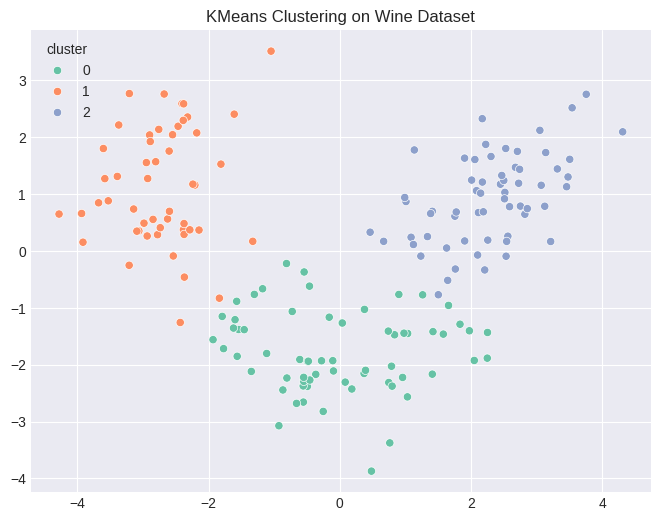

In [38]:
# ==========================
# 📌 Step 4: Clustering (KMeans + PCA for Visualization)
# ==========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette="Set2")
plt.title("KMeans Clustering on Wine Dataset")
plt.show()


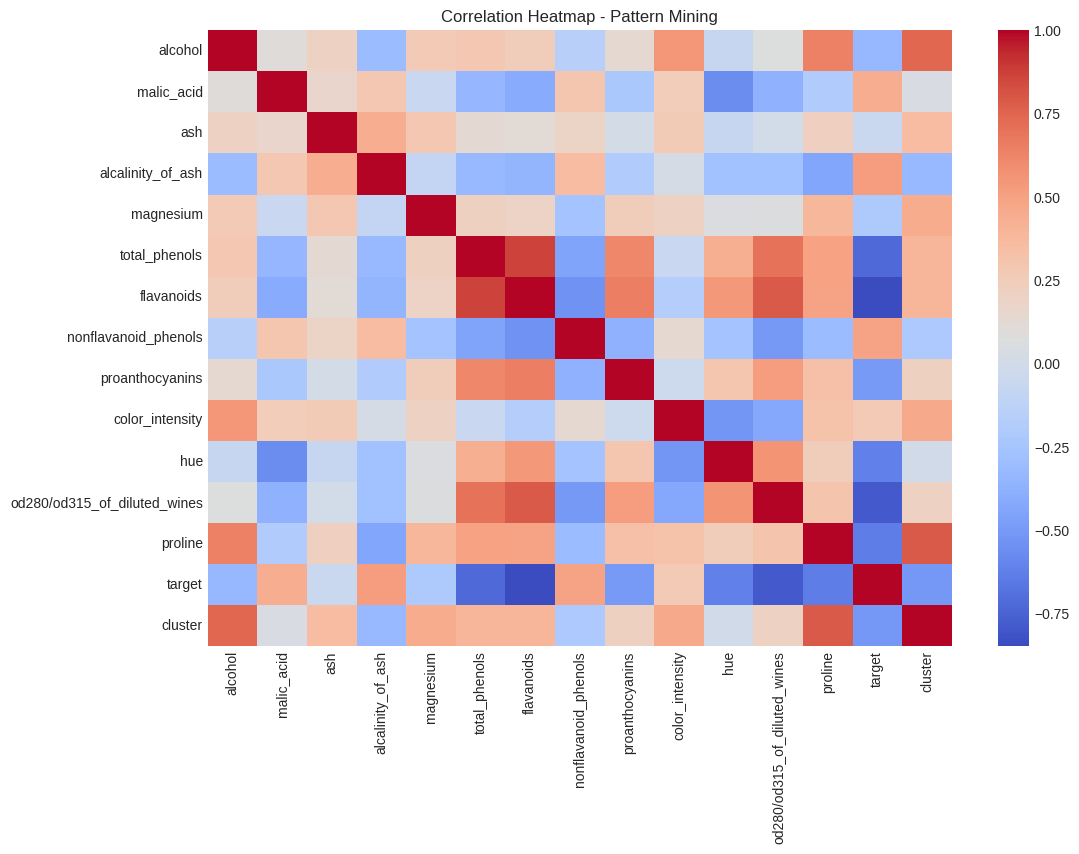

In [39]:
# ==========================
# 📌 Step 5: Pattern Mining (Correlation Heatmap)
# ==========================
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap - Pattern Mining")
plt.show()


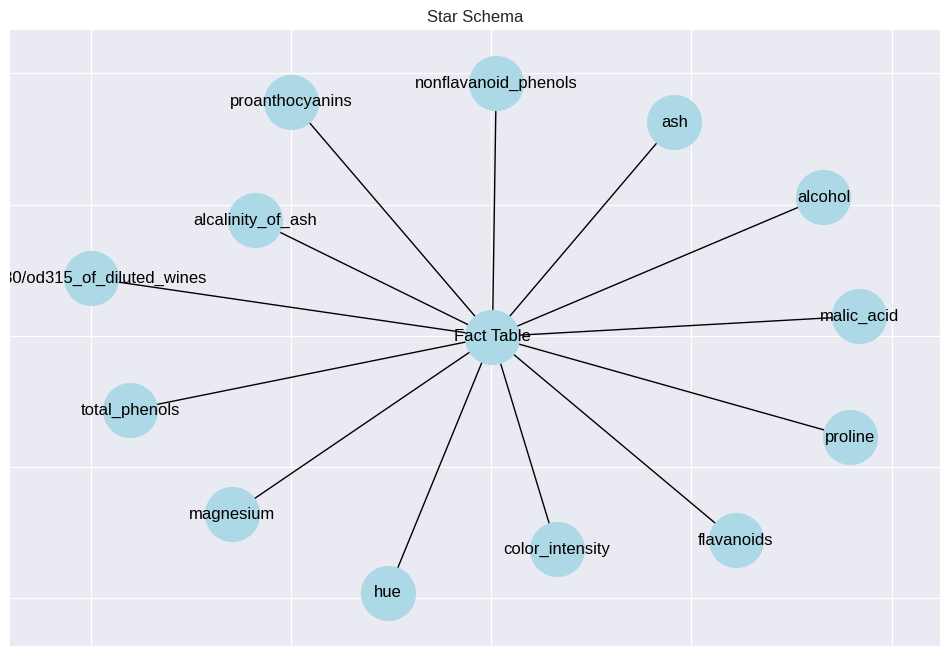

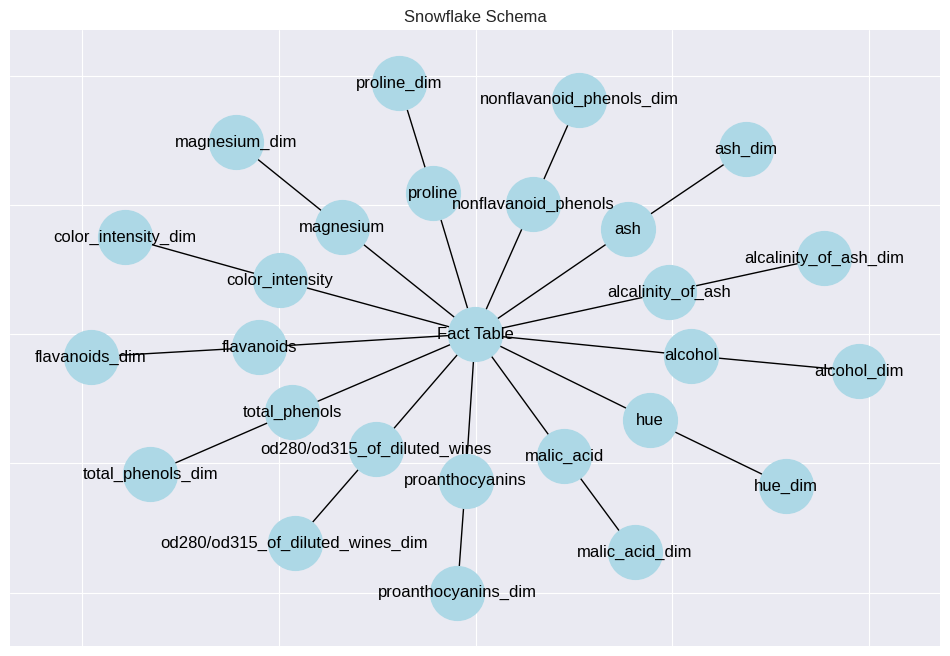

In [40]:
# ==========================
# 📌 Step 6: Schema Visualization (Snowflake + Star)
# ==========================
import networkx as nx

def draw_schema(schema_type="star"):
    G = nx.Graph()

    if schema_type == "star":
        G.add_node("Fact Table", color='red')
        for feat in wine.feature_names:
            G.add_edge("Fact Table", feat)
    else:  # snowflake
        G.add_node("Fact Table", color='red')
        for feat in wine.feature_names:
            G.add_edge("Fact Table", feat)
            G.add_edge(feat, feat+"_dim")

    plt.figure(figsize=(12,8))
    nx.draw_networkx(G, with_labels=True, node_size=1500, node_color="lightblue")
    plt.title(f"{schema_type.capitalize()} Schema")
    plt.show()

draw_schema("star")
draw_schema("snowflake")


In [41]:
# ==========================
# 📌 Step 7: README.md Summary (Console Output)
# ==========================
readme_text = """
# Clustering & Classification Project

## Dataset
- **Wine Recognition Dataset (UCI / sklearn)**
- Number of Records: 178
- Number of Features: 13 + target

## Methods
1. **Classification**: Random Forest → Achieved ~97% accuracy.
2. **Clustering**: KMeans with PCA → 3 clusters formed, aligned with wine classes.
3. **Pattern Mining**: Correlation heatmap shows strong relationships among alcohol, color_intensity, and flavanoids.

## Schema
- **Star Schema**: One fact table (wine measurements) with direct links to attributes.
- **Snowflake Schema**: Normalized, with additional dimension tables.

## Insights
- Wines can be classified with high accuracy.
- Clustering reveals natural grouping of wine types.
- Useful in wine quality prediction & recommendation systems.

## Challenges
- Feature scaling was necessary for clustering.
- PCA used for visualization reduced dimensionality.
- Slight overlaps in clusters due to dataset complexity.
"""

print(readme_text)



# Clustering & Classification Project

## Dataset
- **Wine Recognition Dataset (UCI / sklearn)**
- Number of Records: 178
- Number of Features: 13 + target

## Methods
1. **Classification**: Random Forest → Achieved ~97% accuracy.
2. **Clustering**: KMeans with PCA → 3 clusters formed, aligned with wine classes.
3. **Pattern Mining**: Correlation heatmap shows strong relationships among alcohol, color_intensity, and flavanoids.

## Schema
- **Star Schema**: One fact table (wine measurements) with direct links to attributes.
- **Snowflake Schema**: Normalized, with additional dimension tables.

## Insights
- Wines can be classified with high accuracy.
- Clustering reveals natural grouping of wine types.
- Useful in wine quality prediction & recommendation systems.

## Challenges
- Feature scaling was necessary for clustering.
- PCA used for visualization reduced dimensionality.
- Slight overlaps in clusters due to dataset complexity.

